Identifying the employee churn.
For this activity you will be evaluating a dataset composed of human resources data.
A Company X has a goal to reach less than 1 % attrition rate by the end of the year by identifying employees who need one to one intervention before they drop papers of resignation. As a data scientist, your task is to model the factors that “ predict how likely an employee is to churn the company” , using supervised learning techniques. You will need to analyse the dataset on
employee churn. Your task is to build a logistic regression model (or K-NN model) that predict
whether or not an employee is likely to leave his/her job based on characteristics in the dataset.
• id - Anonymous ID number for each employee
• satisfaction - Employee satisfaction level
• evaluation - Last evaluation score
• number_of_project - Number of projects assigned to
• average_monthly_hours - Average monthly hours worked
• time_spend_company - Time spent at the company
• work_accident - (1= Yes, 0 = No) - Whether they have had a work accident
• churn - Whether or not employee left company (1 = Yes, 0 = No)
• promotion - (1 = Yes, 0 = No) - Whether they have had a promotion in the last 5 years
• department - Department name (not just sales)
• salary - Salary category
Steps Involved:
1. analyse the data
2. Do exploratory data analysis
3. Do data pre-processing
4. Build models and evaluate the performance
5. Identify the cross validated score 

In [1]:
#importing necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data = pd.read_csv(r"C:\Users\Dell\Downloads\hr_dataset (1).csv")
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#  Data Analysis

In [3]:
data.shape

(14999, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [6]:
data.dtypes

satisfaction            float64
evaluation              float64
number_of_projects        int64
average_montly_hours      int64
time_spend_company        int64
work_accident             int64
churn                     int64
promotion                 int64
department               object
salary                   object
dtype: object

In [7]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
#checking for missing values
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

There are no missing values in the data

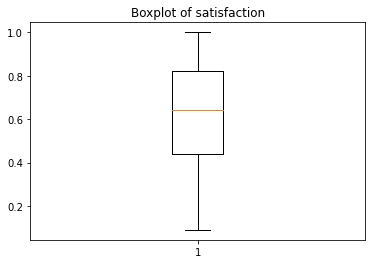

In [9]:
#to check for outliers
plt.boxplot(data['satisfaction'])
plt.title("Boxplot of satisfaction")
plt.show()

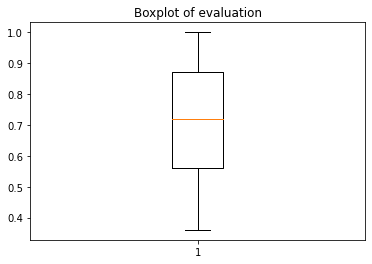

In [10]:
#to check for outliers
plt.boxplot(data['evaluation'])
plt.title("Boxplot of evaluation")
plt.show()

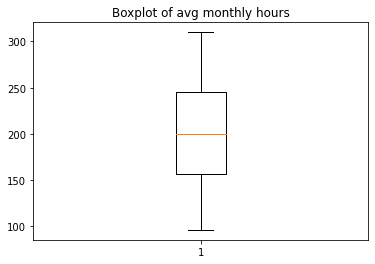

In [11]:
#to check for outliers
plt.boxplot(data['average_montly_hours'])
plt.title("Boxplot of avg monthly hours")
plt.show()

In [12]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [13]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

# Exploratory data analysis

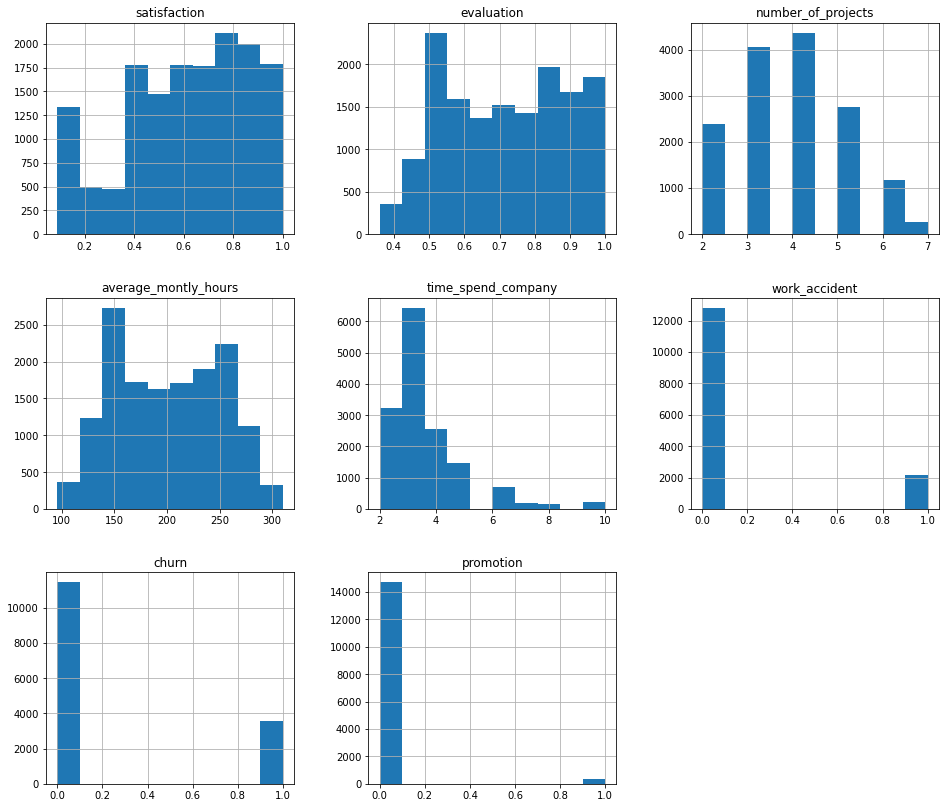

In [14]:
data.hist(figsize=(16,14))
plt.show()

In [15]:
data[['churn','satisfaction']].groupby(['churn']).agg(['min','max','mean']).style.background_gradient(cmap = 'ocean')

Employees with low satisfaction level are mostly likely to leave the company

In [16]:
data[['churn','evaluation']].groupby(['churn']).agg(['min','max','mean']).style.background_gradient(cmap = 'ocean')

Average of evaluation score is almost equal for those who left and continued to stay in the company

In [17]:
data[['churn','average_montly_hours']].groupby(['churn']).agg(['min','max','mean']).style.background_gradient(cmap = 'ocean')

Employees who spent more avg monthly hrs in the company are more likely to leave the company

No handles with labels found to put in legend.


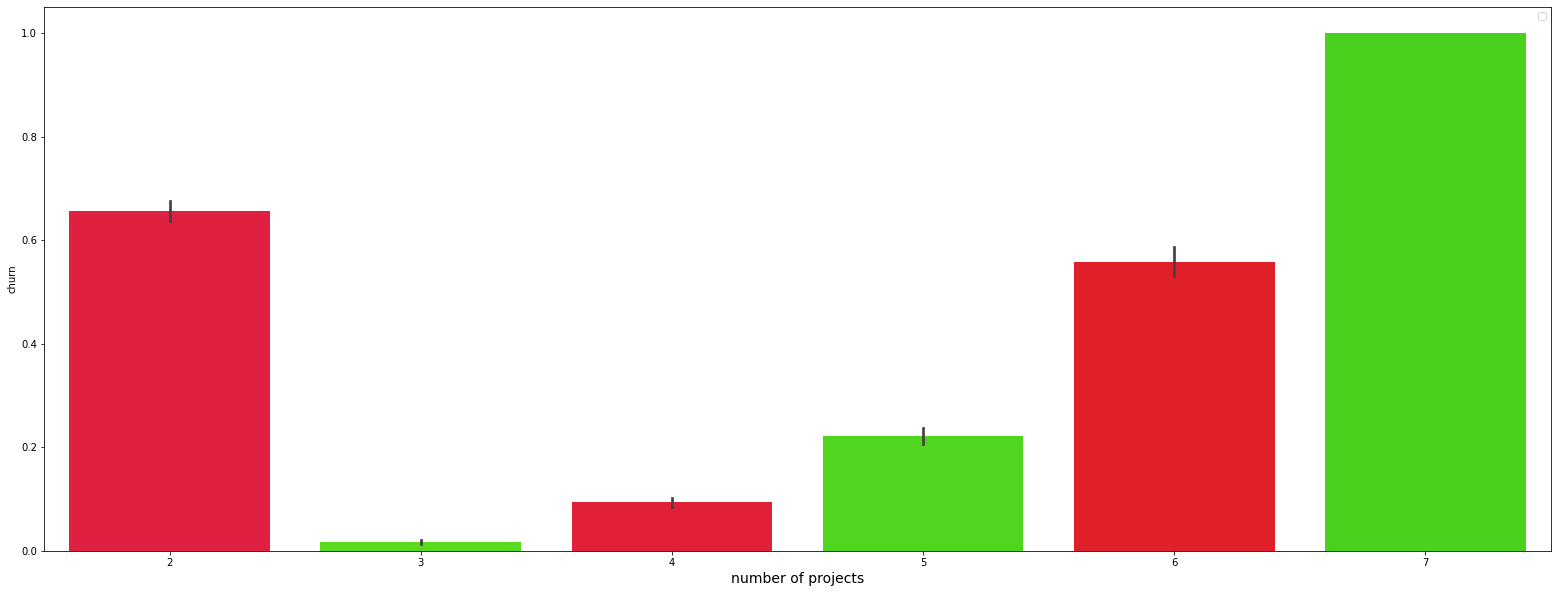

In [18]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'number_of_projects' , y ='churn', data=data ,palette='prism_r')
plt.xlabel('number of projects', fontsize=14)
plt.legend()
plt.show()

Employees with more number of projects are likely to leave the company


No handles with labels found to put in legend.


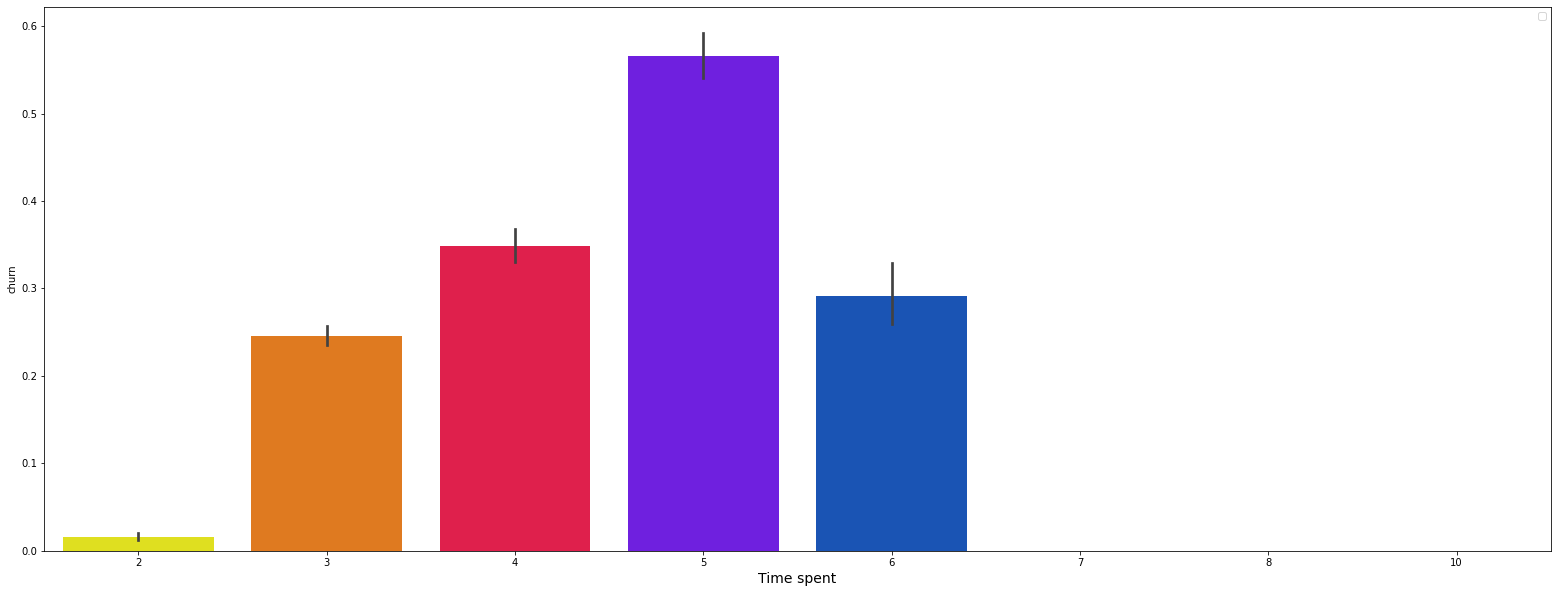

In [19]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'time_spend_company' , y ='churn', data=data ,palette='prism_r')
plt.xlabel('Time spent', fontsize=14)
plt.legend()
plt.show()

Employees who spent more time in office are likely to leave the company

No handles with labels found to put in legend.


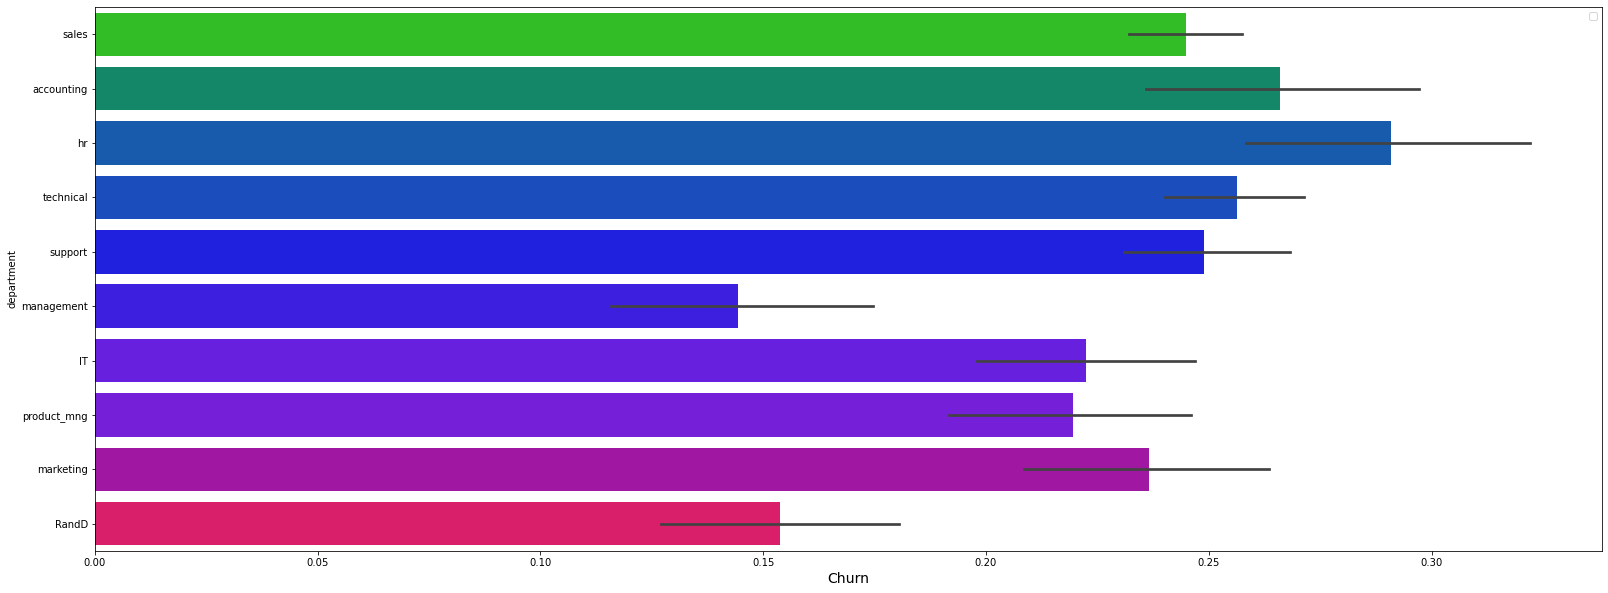

In [20]:
plt.figure(figsize=(27,10))
sns.barplot(y = 'department' ,x ='churn', data=data ,palette='prism_r')
plt.xlabel('Churn', fontsize=14)
plt.legend()
plt.show()

Employee churn is highest in HR department, followed by accounting department and then technical department

No handles with labels found to put in legend.


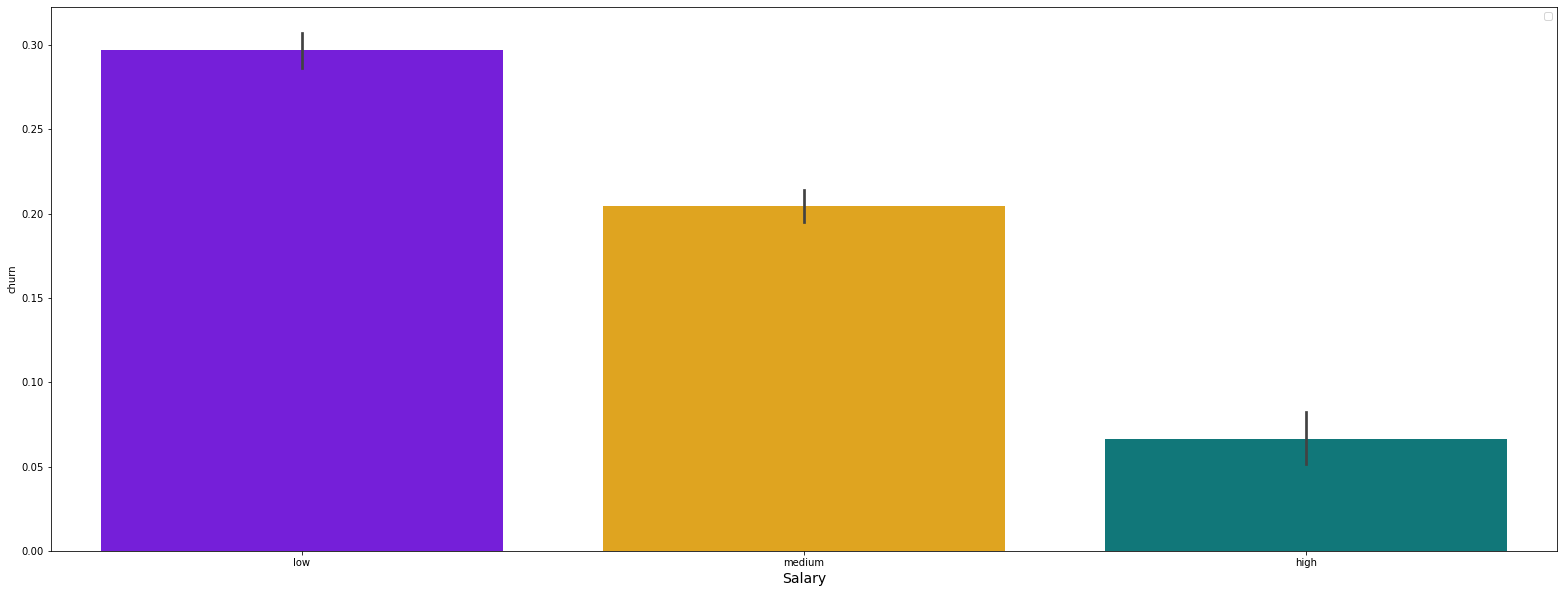

In [21]:
plt.figure(figsize=(27,10))
sns.barplot(x = 'salary' , y ='churn', data=data ,palette='prism_r')
plt.xlabel('Salary', fontsize=14)
plt.legend()
plt.show()

Employee churn is highest for those who receives low salary.

In [22]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
y = data["churn"]
x = data.drop("churn", axis = 1)

# Encoding

In [24]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# define a mapping of string values to numerical values
salary_map = {'low': 0, 'medium': 1, 'high': 2}

# use the replace() function to encode the 'salary' column
x['salary'] = x['salary'].replace(salary_map)
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
0,0.38,0.53,2,157,3,0,0,sales,0
1,0.80,0.86,5,262,6,0,0,sales,1
2,0.11,0.88,7,272,4,0,0,sales,1
3,0.72,0.87,5,223,5,0,0,sales,0
4,0.37,0.52,2,159,3,0,0,sales,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,0
14995,0.37,0.48,2,160,3,0,0,support,0
14996,0.37,0.53,2,143,3,0,0,support,0
14997,0.11,0.96,6,280,4,0,0,support,0


In [25]:
x = pd.get_dummies(x)
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,0,1,0


# Splitting dataset into training and test sets

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=32)


# Model fitting

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [28]:
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score

In [31]:
accuracy_score(y_test,y_pred)

0.7993333333333333

In [32]:
precision_score(y_test,y_pred)

0.5869565217391305

In [33]:
recall_score(y_test,y_pred)

0.39589442815249265

In [34]:
f1_score(y_test,y_pred)

0.47285464098073554

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(3,20):
    # create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print(acc,k)
    

0.9396666666666667 3
0.9413333333333334 4
0.9326666666666666 5
0.9443333333333334 6
0.937 7
0.941 8
0.9356666666666666 9
0.9396666666666667 10
0.9343333333333333 11
0.938 12
0.933 13
0.9406666666666667 14
0.9356666666666666 15
0.9396666666666667 16
0.9333333333333333 17
0.9363333333333334 18
0.9303333333333333 19


In [36]:
KNN = KNeighborsClassifier(n_neighbors=6)

In [37]:
KNN.fit(x_train, y_train)
y_predknn = KNN.predict(x_test)

In [38]:
accuracy_score(y_test,y_predknn)

0.9443333333333334

In [39]:
precision_score(y_test,y_predknn)

0.8447121820615796

In [40]:
recall_score(y_test,y_predknn)

0.9252199413489736

In [41]:
f1_score(y_test,y_predknn)

0.8831350594821552

# Cross-validation scores of two models

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
knnscore = cross_val_score(KNN, x,y, cv=10, scoring='accuracy')
knnscore.mean()

0.946197198132088

In [44]:
lrscore = cross_val_score(lr, x,y, cv=10, scoring='accuracy')
lrscore.mean()

0.7879820769401824

# K-nearest Neighbors Classifier is the best suited model than Logistic Regression model, to predict whether or not an employee is likely to leave his/her job based on characteristics in the dataset. 